## Symbolic solution of ODEs with sympy


In [1]:
import sympy as sym
import sympy
sym.init_printing() # for LaTeX formatted output

import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#plt.style.use("fivethirtyeight")

import scipy as sp
import matplotlib as mpl       # As of July 2017 Bucknell computers use v. 2.x 


%matplotlib notebook
#%matplotlib
%config InlineBackend.figure_format='retina'


mpl.style.use('classic')

plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

from helpFunction import *

# Difference Equation

## Motivation

### Saving

Solve  $${ y }_{ 0 },\quad { y }_{ 1 }=b y_0,\quad { y }_{ n }=b{ y }_{ n-1 }$$ 

In [5]:
x,t,a,b,c,d, n, C0, y0, ybar = sym.symbols("x t a b c d n C0 y0 ybar")
y = sym.Function("y")

### A first order homogeneous difference equation

In [6]:
ode=sym.Eq(y(n), a*y(n-1))
ode

In [7]:
sym.rsolve(ode,y(n))

This function is usually referred to as the **complementary function/solution** of the general first-order difference equation, when we consider the modified first-order difference equation in which we simply ignore the right-hand-side term d.


### general first-order difference equation

In [8]:
ode=sym.Eq(y(n+1),a*y(n)+b)
ode

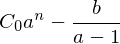

In [9]:
ode_sol=sym.rsolve(ode,y(n))
ode_sol

It is called **general solution** as it is independent of a starting/initial value

In [10]:
ics = {y(0): y0}
ics #initial condition

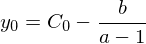

In [11]:
C_eq = sym.Eq(y(n).subs(n, 0).subs(ics), ode_sol.subs(n, 0))
C_eq

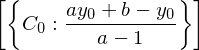

In [12]:
C_sol = sym.solve(C_eq)
C_sol

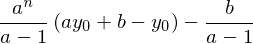

In [13]:
ode_sol.subs(C_sol[0])

This expression is called the **definite solution** to the general first-order difference equation

### First Order Nonlinear Difference Equation

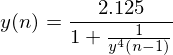

In [14]:
ode=sym.Eq(y(n), 2.125/(1+y(n-1)**(-4)))
ode

### Steady States

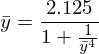

In [15]:
ss=sym.Eq(ybar, 2.125/(1+ybar**(-4)))
ss

In [16]:
sym.solve(ss)

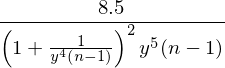

In [17]:
ode.rhs.diff(y(n-1))

In [18]:
ode.rhs.diff(y(n-1)).subs(y(n-1),0.9468)

#### Dynamics and Steady State

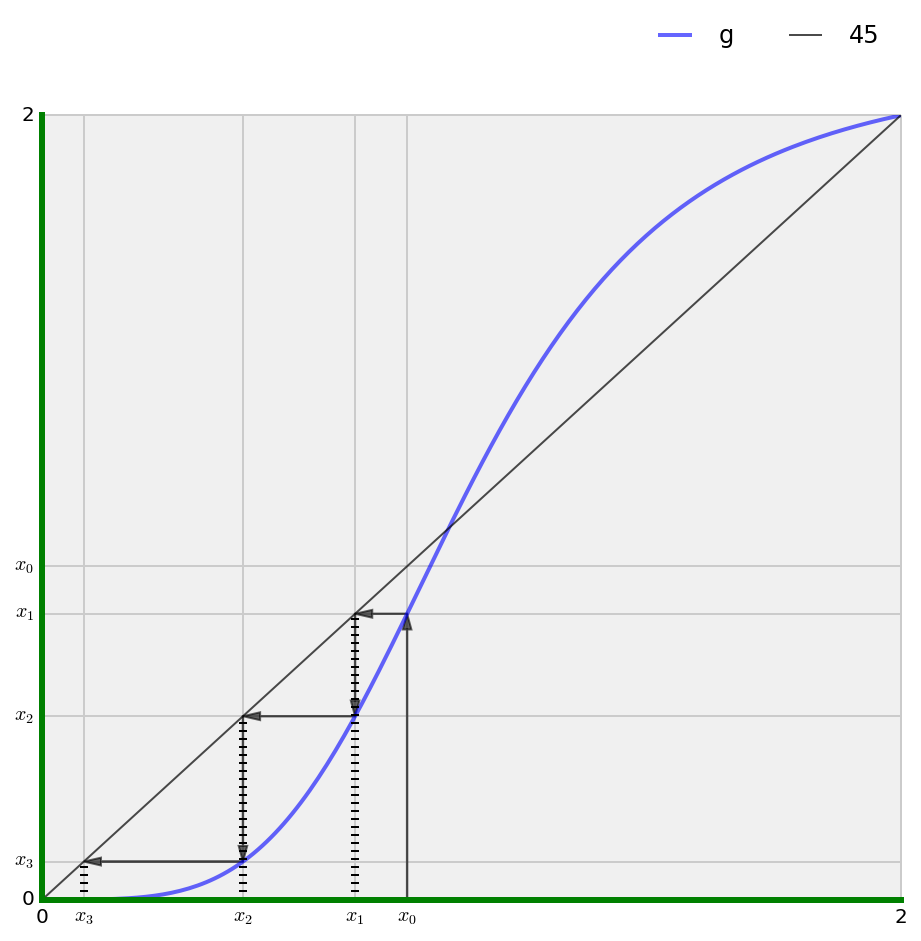

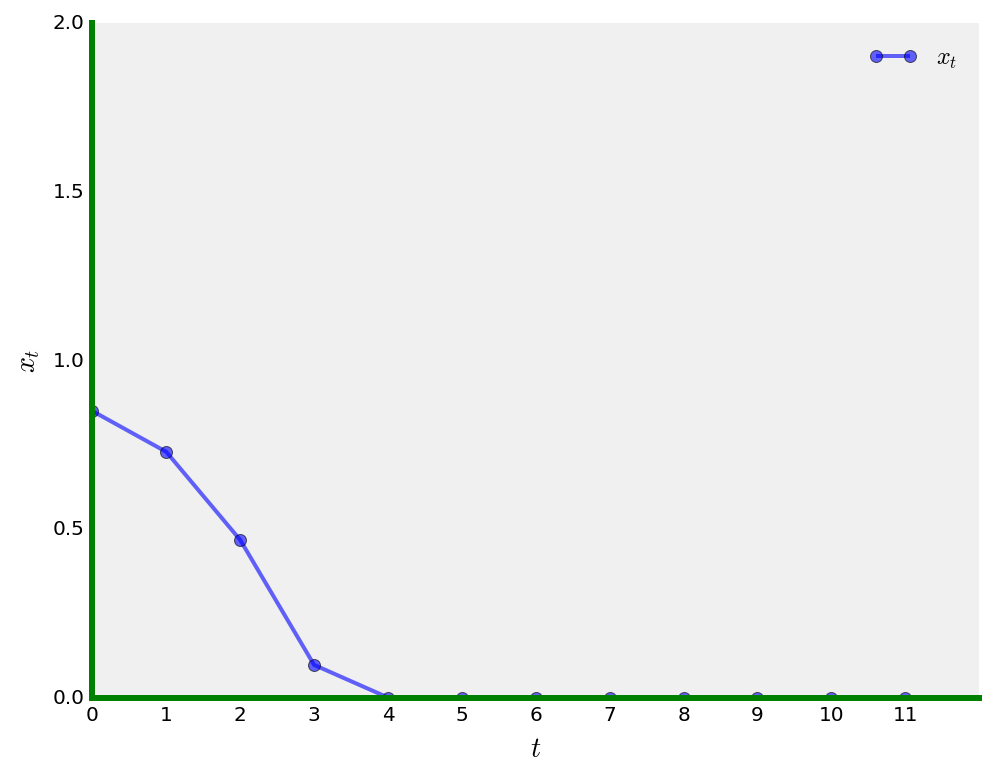

In [19]:

x0 = 0.85
num_arrows = 3
xmin, xmax = 0, 2
ts_length = 12
h = lambda x: 1 / (1 + x**(-4)) 
c = xmax / h(xmax)
g = lambda x: c / (1 + x**(-4))
plot45(g, xmin, xmax, x0, num_arrows)
ts_plot(g, xmin, xmax, x0, ts_length)

#### Second SS 

In [20]:
ode.rhs.diff(y(n-1)).subs(y(n-1),2.0)

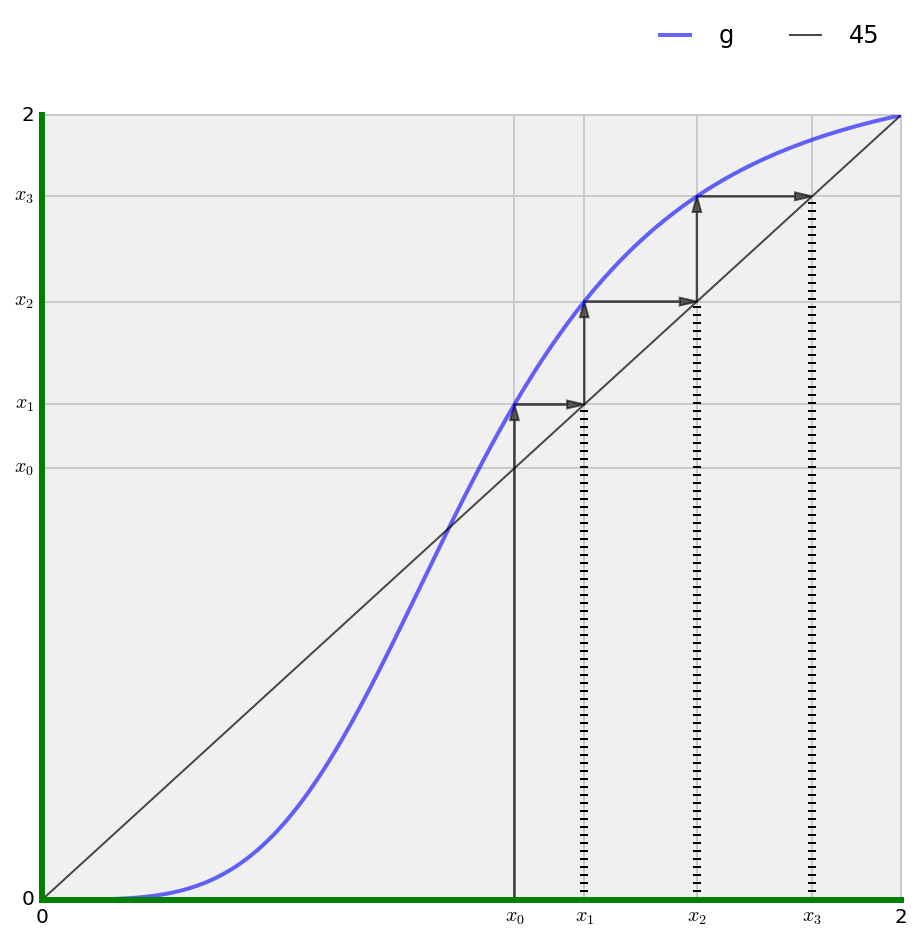

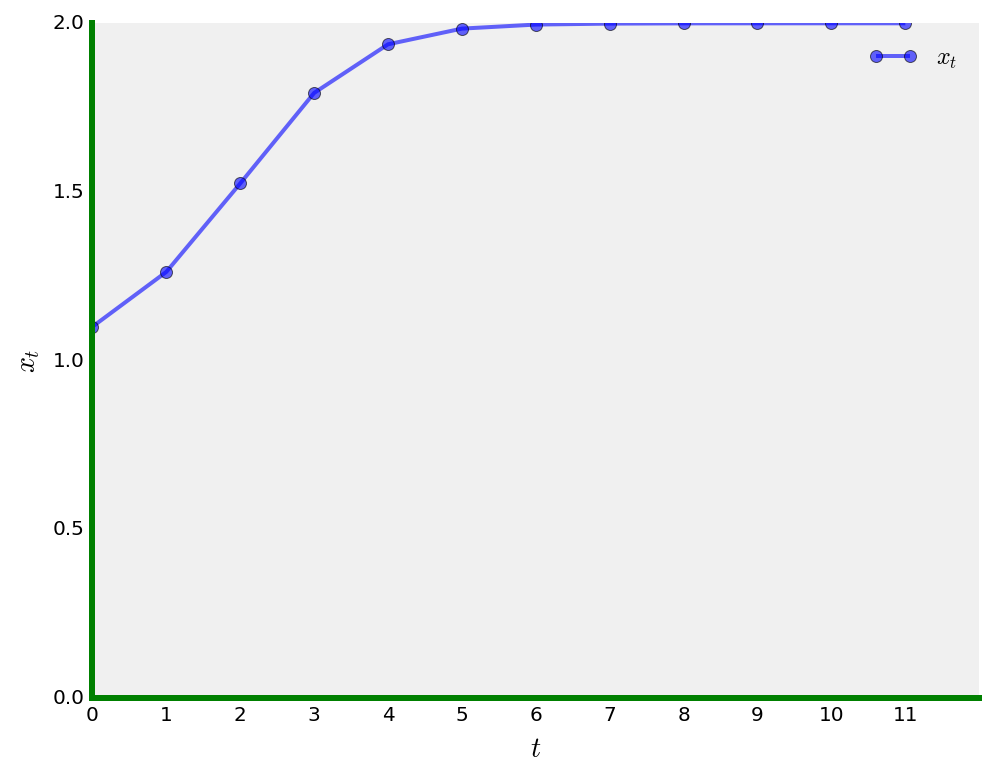

In [21]:
x0 = 1.1
num_arrows = 3
xmin, xmax = 0, 2
ts_length = 12
h = lambda x: 1 / (1 + x**(-4))
c = xmax / h(xmax)
g = lambda x: c / (1 + x**(-4))
plot45(g, xmin, xmax, x0, num_arrows)
ts_plot(g, xmin, xmax, x0, ts_length)

## The non-autonomous, first order, linear difference Eq. Form

In [25]:
ode=sym.Eq(y(n+1), 2*(n+1)**0.5*y(n)-6)
ode

In [26]:
sym.rsolve(ode,y(n))

ValueError: Polynomial or rational function expected, got '-2*(n + 1)**0.5'

### Steady States

In [23]:
ss=sym.Eq(ybar, 2*(n+1)**0.5*ybar-6)
ss

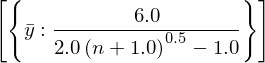

In [24]:
sym.solve(ss)

In [ ]:
x0 = 1.1
num_arrows = 3
xmin, xmax = 0, 2
ts_length = 12
h = lambda x: 1 / (1 + x**(-4))
c = xmax / h(xmax)
g = lambda x: c / (1 + x**(-4))
plot45(g, xmin, xmax, x0, num_arrows)
ts_plot(g, xmin, xmax, x0, ts_length)

### Second Order Difference Equation: Logistics Growth Model (Fish)

In [ ]:
x,t,b,c,d, n, C0, y0, ybar = sym.symbols("x t b c d n C0 y0 ybar")
y = sym.Function("y")

In [ ]:
ode=sym.Eq(y(n+1), 3*y(n)-3*y(n)**2 - 7/48)
ode

### Steady States

In [ ]:
ss=sym.Eq(ybar, 3*ybar-3*ybar**2 - 7/48)
ss

In [ ]:
sym.solve(ss)

#### Slope at SS

In [ ]:
ode.rhs.diff(y(n))

In [ ]:
ode.rhs.diff(y(n)).subs(y(n),0.083)

In [ ]:
ode.rhs.diff(y(n)).subs(y(n),0.583)

#### Maximum of The Function

In [ ]:
sym.solve(ode.rhs.diff(y(n)), y(n) ) # y(n)

In [ ]:
ode.rhs.subs(y(n), .5)  # y(n+1)

#### Dynamics and Steady State

In [ ]:
ode.rhs.diff(y(n)).subs(y(n),0.583)

In [ ]:
num_arrows = 5
xmin, xmax = 0, 1
ts_length = 10
r = 3.2
xstar1 = 0.8 
xstar2 = 0.5
x0 = 0.2
g = lambda x: 3*x-3*x**2 -7/48
plot45(g, xmin, xmax, x0, num_arrows)
ts_plot(g, xmin, xmax, x0, ts_length)

In [ ]:
ode.rhs.diff(y(n)).subs(y(n),0.083)

In [ ]:
num_arrows = 5
xmin, xmax = 0, 1
ts_length = 10
r = 3.2
xstar1 = 0.8 
xstar2 = 0.5
x0 = 0.075
g = lambda x: 3*x-3*x**2 -7/48
plot45(g, xmin, xmax, x0, num_arrows)
ts_plot(g, xmin, xmax, x0, ts_length)

### A first order homogeneous differential equation

In [ ]:
#https://www.youtube.com/watch?v=4X0SGGrXDiI

a, t, y0 = sym.symbols("a t y0")
y = sym.Function("y")

In [ ]:
ode=sym.Eq(y(t).diff(t), a*y(t))
ode

- y: money in bank
- a: interest rate, for example 6%
- t: time year


In [ ]:
sym.classify_ode(ode)

In [ ]:
ode_sol=sym.dsolve(ode, y(t), hint="separable")
ode_sol

In [ ]:
ode_sol.free_symbols

In [ ]:
ics = {y(0): y0}

In [ ]:
def apply_ics(sol, ics, x, known_params):
    """
    Apply the initial conditions (ics), given as a dictionary on
    the form ics = {y(0): y0: y(x).diff(x).subs(x, 0): yp0, ...}
    to the solution of the ODE with indepdendent variable x.
    The undetermined integration constants C1, C2, ... are extracted
    from the free symbols of the ODE solution, excluding symbols in
    the known_params list.
    """
    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
           for n in range(len(ics))]
    sol_params = sym.solve(eqs, free_params)
    return sol.subs(sol_params)

In [ ]:
apply_ics(ode_sol, ics, t, [a])

### Second Order Differential Equation

#### Define the differential equation as a sym.Eq()

In [ ]:
x,t, b,c,d, n, C0, y0 = sym.symbols("x t  b c d n C0 y0")
f = sym.Function("f")

In [ ]:
diffeq = sym.Eq(f(t).diff(t, t) - 2*f(t).diff(t) + f(t), sym.sin(t))
diffeq

#### Solve differential equation

In [ ]:
soln = sym.dsolve(diffeq,f(t))
soln

#### Boundary conditions
This isn't implemented yet in `dsolve` -- it's on the "to do" list<br>
For now, solve for contants on your own. For example, if
$$ f(0) = 1\quad\mbox{and}\quad\left.\frac{df}{dx}\right|_0 = 0,  $$
solve the following equations:

In [ ]:
constants = sym.solve([soln.rhs.subs(t,0) - 1, soln.rhs.diff(t,1).subs(t,0)- 0])
constants

In [ ]:
C1, C2 = sym.symbols('C1,C2')
soln = soln.subs(constants)
soln

#### Convert soln to python function for numerical evaluation/plotting
I'm not sure why I had to specify the modulue for conversion of sympy functions.<br>
See http://docs.sympy.org/latest/modules/utilities/lambdify.html<br>
In previous examples, sympy figured out a good module "on its own." 

In [ ]:
func = sym.lambdify(t,soln.rhs,'numpy')

In [ ]:
xx = sp.arange(-1,1,.01)  # name = xx so it won't collide with symbol x
y = func(xx)
plt.figure()
plt.plot(xx,y);

In [ ]:
from IPython.core.display import HTML, Image
css_file = '../../custom.css'
HTML(open(css_file, 'r').read())

In [ ]:
#%load_ext watermark
%watermark -v -m -p sympy,matplotlib -g